# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\MONIKA KUMARI\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [9]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [10]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [12]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [13]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [14]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [15]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████| 109248/109248 [03:14<00:00, 560.51it/s]


In [16]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

In [17]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,preprocessed_essays
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,my students english learners working english s...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,our students arrive school eager learn they po...


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
# printing some random project title.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)


Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Inspiring Minds by Enhancing the Educational Experience


In [19]:
sent = decontracted(project_data['project_title'].values[20000])
print(sent)
print("="*50)

We Need To Move It While We Input It!


In [20]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bars
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████| 109248/109248 [00:07<00:00, 14159.79it/s]


In [21]:
#after preprocessing
preprocessed_titles[20000]

'we need to move it while we input it'

In [22]:
project_data['preprocessed_title'] = preprocessed_titles
project_data.drop(['project_title'], axis = 1, inplace = True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,preprocessed_essays,preprocessed_title
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,my students english learners working english s...,educational support english learners home
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,our students arrive school eager learn they po...,wanted projector hungry learners


### 1.6 Preprocessing teacher_prefix

In [23]:
x = project_data['teacher_prefix'].replace(to_replace= np.nan, value= "mrs")
teacher_prefix_list = list(x.values)
preprocessed_teacher_prefix=[]
for l in tqdm (teacher_prefix_list):
    n = ""
    for e in l:
        e = e.replace('.', '')
        e = e.replace(',', '')
        n+= e
    preprocessed_teacher_prefix.append(n.lower().strip())

print(len(preprocessed_teacher_prefix))

100%|██████████████████████████████| 109248/109248 [00:00<00:00, 138034.91it/s]


109248


In [24]:
project_data['preprocessed_teacher_prefix'] = preprocessed_teacher_prefix
project_data.drop(['teacher_prefix'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,preprocessed_essays,preprocessed_title,preprocessed_teacher_prefix
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,IN,2016-12-05 13:43:57,Grades PreK-2,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,my students english learners working english s...,educational support english learners home,mrs
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,FL,2016-10-25 09:22:10,Grades 6-8,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,our students arrive school eager learn they po...,wanted projector hungry learners,mr


### 1.7 Preprocessing project_grade_category

In [25]:
project_grade_category_list = list(project_data['project_grade_category'].values)
preprocessed_project_grade_category=[]
for l in tqdm (project_grade_category_list):
    n = ""
    for e in l:
        e = e.replace(' ', '_')
        e = e.replace('-', '_')
        n+= e
    preprocessed_project_grade_category.append(n.lower().strip())

print(len(preprocessed_project_grade_category))

100%|███████████████████████████████| 109248/109248 [00:02<00:00, 53173.10it/s]


109248


In [26]:
project_data['preprocessed_project_grade_category'] = preprocessed_project_grade_category
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,school_state,project_submitted_datetime,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,preprocessed_essays,preprocessed_title,preprocessed_teacher_prefix,preprocessed_project_grade_category
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,IN,2016-12-05 13:43:57,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,my students english learners working english s...,educational support english learners home,mrs,grades_prek_2
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,FL,2016-10-25 09:22:10,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,our students arrive school eager learn they po...,wanted projector hungry learners,mr,grades_6_8


### 2. Computing Sentiment Scores for preprocessed_essays

In [27]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
neg= []
pos= []
neu= []
compound= []
for k in tqdm(project_data['preprocessed_essays'], position= 0, leave= True):
    a= sid.polarity_scores(k)['neg']
    b= sid.polarity_scores(k)['pos']
    c= sid.polarity_scores(k)['neu']
    d= sid.polarity_scores(k)['compound']
    neg.append(a)
    pos.append(b)
    neu.append(c)
    compound.append(d)

C:\Users\MONIKA KUMARI\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.

100%|██████████████████████████████████| 109248/109248 [38:08<00:00, 47.74it/s]


In [28]:
project_data['neg'] = neg
project_data['pos'] = pos 
project_data['neu'] = neu
project_data['compound'] = compound

In [30]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,school_state,project_submitted_datetime,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,...,clean_categories,clean_subcategories,preprocessed_essays,preprocessed_title,preprocessed_teacher_prefix,preprocessed_project_grade_category,neg,pos,neu,compound
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,IN,2016-12-05 13:43:57,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,...,Literacy_Language,ESL Literacy,my students english learners working english s...,educational support english learners home,mrs,grades_prek_2,0.012,0.144,0.844,0.9694
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,FL,2016-10-25 09:22:10,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,...,History_Civics Health_Sports,Civics_Government TeamSports,our students arrive school eager learn they po...,wanted projector hungry learners,mr,grades_6_8,0.048,0.283,0.669,0.9856


#### 2.1 Number of words in combined essays

In [31]:
word_count_essay = []
for w in project_data['preprocessed_essays']:
    s = len(w.split())
    word_count_essay.append(s)

In [32]:
project_data['word_count_essay'] = word_count_essay
project_data.head(2)

,Unnamed: 0,id,teacher_id,school_state,project_submitted_datetime,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,...,clean_subcategories,preprocessed_essays,preprocessed_title,preprocessed_teacher_prefix,preprocessed_project_grade_category,neg,pos,neu,compound,word_count_essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,IN,2016-12-05 13:43:57,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,...,ESL Literacy,my students english learners working english s...,educational support english learners home,mrs,grades_prek_2,0.012,0.144,0.844,0.9694,161
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,FL,2016-10-25 09:22:10,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,...,Civics_Government TeamSports,our students arrive school eager learn they po...,wanted projector hungry learners,mr,grades_6_8,0.048,0.283,0.669,0.9856,109


#### 2.2 Number of words in preprocessed_titles

In [33]:
word_count_title= []
for w in project_data['preprocessed_title']:
    s = len(w.split())
    word_count_title.append(s)
#print(word_count_title)    

In [34]:
project_data['word_count_title'] = word_count_title
project_data.head(2)

,Unnamed: 0,id,teacher_id,school_state,project_submitted_datetime,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,...,preprocessed_essays,preprocessed_title,preprocessed_teacher_prefix,preprocessed_project_grade_category,neg,pos,neu,compound,word_count_essay,word_count_title
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,IN,2016-12-05 13:43:57,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,...,my students english learners working english s...,educational support english learners home,mrs,grades_prek_2,0.012,0.144,0.844,0.9694,161,5
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,FL,2016-10-25 09:22:10,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,...,our students arrive school eager learn they po...,wanted projector hungry learners,mr,grades_6_8,0.048,0.283,0.669,0.9856,109,4


In [35]:
# merging resource_data with project_data 
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [36]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,school_state,project_submitted_datetime,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,...,preprocessed_teacher_prefix,preprocessed_project_grade_category,neg,pos,neu,compound,word_count_essay,word_count_title,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,IN,2016-12-05 13:43:57,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,...,mrs,grades_prek_2,0.012,0.144,0.844,0.9694,161,5,154.6,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,FL,2016-10-25 09:22:10,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,...,mr,grades_6_8,0.048,0.283,0.669,0.9856,109,4,299.0,1


## 3. Preparing data for models

In [37]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'preprocessed_essays',
       'preprocessed_title', 'preprocessed_teacher_prefix',
       'preprocessed_project_grade_category', 'neg', 'pos', 'neu', 'compound',
       'word_count_essay', 'word_count_title', 'price', 'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## 3.1 Loading Data

In [38]:
project_data.to_csv('data.csv',index=False)

In [39]:
data = pd.read_csv('data.csv')
data.head(2)

,Unnamed: 0,id,teacher_id,school_state,project_submitted_datetime,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,...,preprocessed_teacher_prefix,preprocessed_project_grade_category,neg,pos,neu,compound,word_count_essay,word_count_title,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,IN,2016-12-05 13:43:57,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,...,mrs,grades_prek_2,0.012,0.144,0.844,0.9694,161,5,154.6,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,FL,2016-10-25 09:22:10,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,...,mr,grades_6_8,0.048,0.283,0.669,0.9856,109,4,299.0,1


<h2>3.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [40]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,Unnamed: 0,id,teacher_id,school_state,project_submitted_datetime,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,...,preprocessed_teacher_prefix,preprocessed_project_grade_category,neg,pos,neu,compound,word_count_essay,word_count_title,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,IN,2016-12-05 13:43:57,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,...,mrs,grades_prek_2,0.012,0.144,0.844,0.9694,161,5,154.6,23


In [41]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify= y) # this is random splitting
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify= y_train) # this is random splitting


print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(73196, 25) (73196,)
(36052, 25) (36052,)


In [42]:
#value count in numpy array #https://stackoverflow.com/a/28663910
unique, counts = np.unique(y_train, return_counts=True) #counts the majority and minority class labels in train dataset
dict(zip(unique, counts))

{0: 11083, 1: 62113}

### 3.3. Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### 3.3.1. encoding categorical features: clean_category

In [43]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
#X_cv_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_categories_ohe.shape, y_train.shape)
#print(X_cv_categories_ohe.shape, y_cv.shape)
print(X_test_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [51]:
#print(X_test_categories_ohe)

  (0, 2)	1
  (1, 4)	1
  (1, 5)	1
  (2, 2)	1
  (3, 2)	1
  (4, 5)	1
  (4, 6)	1
  (5, 2)	1
  (6, 4)	1
  (6, 5)	1
  (7, 4)	1
  (7, 5)	1
  (8, 5)	1
  (9, 4)	1
  (10, 4)	1
  (11, 2)	1
  (11, 7)	1
  (12, 4)	1
  (13, 4)	1
  (13, 5)	1
  (14, 4)	1
  (15, 4)	1
  (15, 6)	1
  (16, 5)	1
  (17, 5)	1
  :	:
  (36034, 4)	1
  (36034, 6)	1
  (36035, 5)	1
  (36036, 4)	1
  (36036, 5)	1
  (36037, 4)	1
  (36038, 4)	1
  (36039, 5)	1
  (36039, 6)	1
  (36040, 0)	1
  (36041, 4)	1
  (36041, 7)	1
  (36042, 4)	1
  (36042, 5)	1
  (36043, 4)	1
  (36044, 5)	1
  (36045, 4)	1
  (36046, 5)	1
  (36047, 6)	1
  (36048, 0)	1
  (36048, 7)	1
  (36049, 4)	1
  (36049, 7)	1
  (36050, 4)	1
  (36051, 4)	1


### 3.3.2. encoding categorical features: clean_subcategory

In [43]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
#X_cv_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategories_ohe.shape, y_train.shape)
#print(X_cv_subcategories_ohe.shape, y_cv.shape)
print(X_test_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [44]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 3.3.3. encoding categorical features: School State

In [45]:
state_vectorizer = CountVectorizer()
state_vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = state_vectorizer.transform(X_train['school_state'].values)
#X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = state_vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
#print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(state_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### 3.3.4 encoding categorical features: teacher_prefix

In [46]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['preprocessed_teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['preprocessed_teacher_prefix'].values)
#X_cv_teacher_ohe = vectorizer.transform(X_cv['preprocessed_teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['preprocessed_teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
#print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [47]:
project_data['preprocessed_teacher_prefix'].value_counts()

mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: preprocessed_teacher_prefix, dtype: int64

### 3.3.5. encoding categorical features: project_grade_category

In [48]:
grade_vectorizer = CountVectorizer()
grade_vectorizer.fit(X_train['preprocessed_project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = grade_vectorizer.transform(X_train['preprocessed_project_grade_category'].values)
#X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = grade_vectorizer.transform(X_test['preprocessed_project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
#print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(grade_vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### 3.4. Vectorizing Text data

#### 3.4.1. Bag of words on preprocessed_essays

In [49]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features = 5000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['preprocessed_essays'].values)
#X_cv_essay_bow = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
#print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)


(73196, 25) (73196,)
(36052, 25) (36052,)
After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


#### 3.4.2 Bag of words on preprocessed_titles

In [50]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2),max_features = 5000)
vectorizer.fit(X_train['preprocessed_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['preprocessed_title'].values)
#X_cv_title_bow = vectorizer.transform(X_cv['preprocessed_titles'].values)
X_test_title_bow = vectorizer.transform(X_test['preprocessed_title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
#print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)

(73196, 25) (73196,)
(36052, 25) (36052,)
After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


#### 3.4.3 TFIDF vectorizer on preprocessed_essays

In [51]:
print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features = 5000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
#X_cv_essay_tfidf = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
#print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)


(73196, 25) (73196,)
(36052, 25) (36052,)
After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


#### 3.4.4 TFIDF vectorization on preprocessed_titles

In [52]:
print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5,ngram_range=(1,2),max_features = 5000)
vectorizer.fit(X_train['preprocessed_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_tfidf = vectorizer.transform(X_train['preprocessed_title'].values)
#X_cv_titles_tfidf = vectorizer.transform(X_cv['preprocessed_titles'].values)
X_test_titles_tfidf = vectorizer.transform(X_test['preprocessed_title'].values)

print("After vectorizations")
print(X_train_titles_tfidf.shape, y_train.shape)
#print(X_cv_titles_tfidf.shape, y_cv.shape)
print(X_test_titles_tfidf.shape, y_test.shape)
print("="*100)

(73196, 25) (73196,)
(36052, 25) (36052,)
After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


#### 3.4.5. Using Pretrained Models: Avg W2V

In [53]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [54]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [55]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████| 109248/109248 [01:06<00:00, 1649.36it/s]


109248
300


#### 3.4.5.1 Using Pretrained Models: Avg W2V on preprocessed_essays

In [56]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays'].values, position= 0, leave= True): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essays_train.append(vector)

print(len(avg_w2v_essays_train))
print(len(avg_w2v_essays_train[0]))

100%|██████████████████████████████████| 73196/73196 [00:43<00:00, 1668.03it/s]


73196
300


In [57]:
avg_w2v_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays'].values, position= 0, leave= True): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essays_test.append(vector)
print(len(avg_w2v_essays_test))
print(len(avg_w2v_essays_test[0]))

100%|██████████████████████████████████| 36052/36052 [00:21<00:00, 1661.04it/s]


36052
300


#### 3.4.5.2 Using Pretrained Models: Avg W2V on project_title

In [58]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_title'].values, position= 0, leave= True): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles_train.append(vector)

print(len(avg_w2v_titles_train))
print(len(avg_w2v_titles_train[0]))
#print(avg_w2v_titles_train[0])

100%|█████████████████████████████████| 73196/73196 [00:02<00:00, 29300.74it/s]


73196
300


In [59]:
avg_w2v_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_title'].values, position= 0, leave= True): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles_test.append(vector)

100%|█████████████████████████████████| 36052/36052 [00:01<00:00, 23840.23it/s]


#### 3.4.5.3 Using Pretrained Models: TFIDF weighted W2V on preprocessed_essays

In [60]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [61]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays'].values, position= 0, leave= True): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each words
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_train.append(vector)

print(len(tfidf_w2v_essay_train))
print(len(tfidf_w2v_essay_train[0]))

100%|███████████████████████████████████| 73196/73196 [05:18<00:00, 229.86it/s]


73196
300


In [62]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays'].values, position= 0, leave= True): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each words
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_test.append(vector)

print(len(tfidf_w2v_essay_test))
print(len(tfidf_w2v_essay_test[0]))

100%|███████████████████████████████████| 36052/36052 [02:35<00:00, 231.75it/s]


36052
300


#### 3.4.5.4 Using Pretrained Models: TFIDF weighted W2V on Project_title

In [63]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [64]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_title'].values, position= 0, leave= True): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_train.append(vector)

print(len(tfidf_w2v_title_train))
print(len(tfidf_w2v_title_train[0]))

100%|█████████████████████████████████| 73196/73196 [00:04<00:00, 14644.44it/s]


73196
300


In [65]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_title'].values, position= 0, leave= True): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_test.append(vector)

print(len(tfidf_w2v_title_test))
print(len(tfidf_w2v_title_test[0]))

100%|█████████████████████████████████| 36052/36052 [00:02<00:00, 14400.61it/s]


36052
300


### 3.5. Vectorizing Numerical features

In [66]:
data.head(1)

,Unnamed: 0,id,teacher_id,school_state,project_submitted_datetime,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,...,preprocessed_teacher_prefix,preprocessed_project_grade_category,neg,pos,neu,compound,word_count_essay,word_count_title,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,IN,2016-12-05 13:43:57,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,...,mrs,grades_prek_2,0.012,0.144,0.844,0.9694,161,5,154.6,23


#### 3.5.1. encoding numerical features: price

In [67]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of sthis data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
print(price_standardized_train.shape,y_train.shape)
print(price_standardized_test.shape,y_test.shape)


Mean : 297.89765683917153, Standard deviation : 371.09985227095217
(73196, 1) (73196,)
(36052, 1) (36052,)
Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [68]:
price_standardized_train

array([[-0.39888902],
       [-0.5967064 ],
       [-0.25986983],
       ...,
       [-0.5761459 ],
       [-0.65925021],
       [-0.21489542]])

#### 3.5.2 encoding numerical features: teacher_number_of_previously_posted_projects

In [69]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

prev_projects_scalar = StandardScaler()
prev_projects_scalar.fit((X_train['teacher_number_of_previously_posted_projects'].values.astype(float)).reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {prev_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(prev_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
prev_projects_standardized_train = prev_projects_scalar.transform((X_train['teacher_number_of_previously_posted_projects'].values.astype(float)).reshape(-1, 1))
prev_projects_standardized_test = prev_projects_scalar.transform((X_test['teacher_number_of_previously_posted_projects'].values.astype(float)).reshape(-1, 1))
print(prev_projects_standardized_train.shape,y_train.shape)
print(prev_projects_standardized_test.shape,y_test.shape)

Mean : 11.19103502923657, Standard deviation : 27.991769358648625
(73196, 1) (73196,)
(36052, 1) (36052,)


In [70]:
psrint(prev_projects_standardized_train)

[[-0.39979734]
 [ 1.70796509]
 [-0.39979734]
 ...
 [-0.32834777]
 [ 0.10034968]
 [-0.36407256]]


#### 3.5.3 encoding numerical features: quantity

In [71]:
quantity_scalar = StandardScaler()
quantity_scalar.fit((X_train['quantity'].values.astype(float)).reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized_train = quantity_scalar.transform((X_train['quantity'].values.astype(float)).reshape(-1, 1))
quantity_standardized_test = quantity_scalar.transform((X_test['quantity'].values.astype(float)).reshape(-1, 1))
print(quantity_standardized_train.shape,y_train.shape)
print(quantity_standardized_test.shape,y_test.shape)

Mean : 16.99729493414941, Standard deviation : 26.099569279799027
(73196, 1) (73196,)
(36052, 1) (36052,)


In [72]:
print(quantity_standardized_train)

[[ 1.11123309]
 [-0.11484078]
 [-0.45967406]
 ...
 [-0.1914704 ]
 [ 1.03460347]
 [-0.26810002]]


### 3.6. Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [73]:
print(X_train_categories_ohe.shape)
print(X_test_categories_ohe.shape)
print(X_train_subcategories_ohe.shape)
print(X_test_subcategories_ohe.shape)
print(X_train_state_ohe.shape)
print(X_test_state_ohe.shape)
print(X_train_grade_ohe.shape)
print(X_test_grade_ohe.shape)

print(X_train_essay_bow.shape)
print(X_test_essay_bow.shape)
print(price_standardized_train.shape)
print(price_standardized_test.shape)

(73196, 9)
(36052, 9)
(73196, 30)
(36052, 30)
(73196, 51)
(36052, 51)
(73196, 4)
(36052, 4)
(73196, 5000)
(36052, 5000)
(73196, 1)
(36052, 1)


In [74]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_1 = hstack((X_train_essay_bow, X_train_title_bow, X_train_categories_ohe, X_train_subcategories_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, price_standardized_train, quantity_standardized_train, prev_projects_standardized_train)).tocsr()
#X_cr = hstack((X_cv_essay_bow, X_cv_title_bow, X_cv_resources_bow, X_cv_categories_ohe, X_cv_subcategories_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_quantity_norm, X_cv_projects_norm)).tocsr()
X_te_1 = hstack((X_test_essay_bow, X_test_title_bow, X_test_categories_ohe, X_test_subcategories_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, price_standardized_test, quantity_standardized_test, prev_projects_standardized_test)).tocsr()

print("Final Data matrix")
print(X_tr_1.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te_1.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 10102) (73196,)
(36052, 10102) (36052,)


#### SET 2

In [75]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_2 = hstack((X_train_essay_tfidf, X_train_titles_tfidf, X_train_categories_ohe, X_train_subcategories_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, price_standardized_train, quantity_standardized_train, prev_projects_standardized_train)).tocsr()
#X_cr = hstack((X_cv_essay_bow, X_cv_title_bow, X_cv_resources_bow, X_cv_categories_ohe, X_cv_subcategories_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_quantity_norm, X_cv_projects_norm)).tocsr()
X_te_2 = hstack((X_test_essay_tfidf, X_test_titles_tfidf, X_test_categories_ohe, X_test_subcategories_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, price_standardized_test, quantity_standardized_test, prev_projects_standardized_test)).tocsr()

print("Final Data matrix")
print(X_tr_2.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te_2.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 10102) (73196,)
(36052, 10102) (36052,)


In [76]:
from scipy.sparse import hstack
X_tr_3 = hstack((avg_w2v_essays_train, avg_w2v_titles_train, X_train_categories_ohe, X_train_subcategories_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, price_standardized_train, quantity_standardized_train, prev_projects_standardized_train)).tocsr()
#X_cr = hstack((X_cv_essay_bow, X_cv_title_bow, X_cv_resources_bow, X_cv_categories_ohe, X_cv_subcategories_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_quantity_norm, X_cv_projects_norm)).tocsr()
X_te_3 = hstack((avg_w2v_essays_test, avg_w2v_titles_test, X_test_categories_ohe, X_test_subcategories_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, price_standardized_test, quantity_standardized_test, prev_projects_standardized_test)).tocsr()

print("Final Data matrix")
print(X_tr_3.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te_3.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 702) (73196,)
(36052, 702) (36052,)


In [77]:
from scipy.sparse import hstack
X_tr_4 = hstack((tfidf_w2v_essay_train, tfidf_w2v_title_train, X_train_categories_ohe, X_train_subcategories_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, price_standardized_train, quantity_standardized_train, prev_projects_standardized_train)).tocsr()
#X_cr = hstack((X_cv_essay_bow, X_cv_title_bow, X_cv_resources_bow, X_cv_categories_ohe, X_cv_subcategories_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_quantity_norm, X_cv_projects_norm)).tocsr()
X_te_4 = hstack((tfidf_w2v_essay_test, tfidf_w2v_title_test, X_test_categories_ohe, X_test_subcategories_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, price_standardized_test, quantity_standardized_test, prev_projects_standardized_test)).tocsr()

print("Final Data matrix")
print(X_tr_4.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te_4.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 702) (73196,)
(36052, 702) (36052,)


__ Computing Sentiment Scores__

In [78]:
'''import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93
'''

"import nltk\nfrom nltk.sentiment.vader import SentimentIntensityAnalyzer\n\n# import nltk\n# nltk.download('vader_lexicon')\n\nsid = SentimentIntensityAnalyzer()\n\nfor_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide rangeof techniques to help all my students succeed students in my class come from a variety of different backgrounds which makesfor wonderful sharing of experiences and cultures including native americans our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it ismastered having the social skills to work cooperatively with friends is a crucial aspect of the 

<h1>4. Support Vector Machines </h1>

<h2>4.1 Appling Support Vector Machines on different kind of featurization</h2>

### 4.1.1 Applying SVM on BOW (SET 1)

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

svc = SGDClassifier(loss='hinge', penalty='l2', class_weight = 'balanced')
#clf= GridSearchCV(svc, parameters, cv= 10, scoring= 'roc_auc')

def hyper_param_tuning(X_train_sample, y_train_sample):
    #svc = SGDClassifier(loss='hinge', penalty='l2')
    parameters = [{'alpha': [10**-4, 10**-2, 10**-1, 10**0, 10**-1, 10**2, 10**4]}]
    clf= GridSearchCV(svc, parameters, cv= 10, scoring= 'roc_auc')
    clf.fit(X_train_sample, y_train_sample)

    results = pd.DataFrame.from_dict(clf.cv_results_)
    results = results.sort_values(['param_alpha'])

    train_auc= results['mean_train_score']
    train_auc_std= results['std_train_score']
    cv_auc = results['mean_test_score'] 
    cv_auc_std= results['std_test_score']
    a =  results['param_alpha']

    alpha = [10**-4, 10**-2, 10**-1, 10**0, 10**-1, 10**2, 10**4]
    log_a= []
    for a in alpha:
        log_a.append(np.log10(a))
    #print(log_a)
    plt.plot(log_a, train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    # plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
    plt.plot(log_a, cv_auc, label='Test AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    # plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(log_a, train_auc, label='Train AUC points')
    plt.scatter(log_a, cv_auc, label='Test AUC points')

    plt.legend()
    plt.xlabel("log_a: hyperparameter")
    #plt.xscale('log',basex=10) 
    plt.ylabel("AUC")
    plt.title("Hyper parameter Vs AUC plot")
    plt.grid()
    plt.show()
    print('Best score: ',clf.best_score_)
    print('value of alpha with best score: ',clf.best_params_)
    print('='*75)
    print('Train AUC scores')
    print(results['mean_train_score'])
    print('CV AUC scores')
    print(results['mean_test_score'])
    return results.head()

#### 4.1.1.1 Hyperparameter tuning Using L2 regulariser

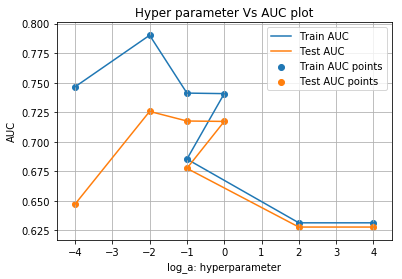

Best score:  0.725779239202959
value of alpha with best score:  {'alpha': 0.01}
Train AUC scores
0    0.746591
1    0.790243
2    0.741276
4    0.740822
3    0.685412
5    0.631464
6    0.631464
Name: mean_train_score, dtype: float64
CV AUC scores
0    0.647265
1    0.725779
2    0.717650
4    0.717296
3    0.677577
5    0.627882
6    0.627881
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.658245,0.188894,0.007810,0.014398,0.0001,{'alpha': 0.0001},0.641905,0.654255,0.655664,0.634598,...,0.756895,0.734265,0.756551,0.737478,0.740754,0.753844,0.742093,0.748635,0.746591,0.007663
1,0.621843,0.013617,0.006246,0.007650,0.01,{'alpha': 0.01},0.733390,0.727488,0.713940,0.725710,...,0.790474,0.788386,0.790372,0.791227,0.788082,0.790357,0.790366,0.792474,0.790243,0.001228
2,0.648396,0.016010,0.009374,0.007653,0.1,{'alpha': 0.1},0.729269,0.719868,0.712751,0.715474,...,0.740588,0.741302,0.742502,0.742353,0.740125,0.740124,0.740526,0.741685,0.741276,0.000844
4,0.642149,0.012980,0.006246,0.007650,0.1,{'alpha': 0.1},0.727429,0.718483,0.713132,0.716168,...,0.741524,0.740842,0.740661,0.741137,0.739652,0.740454,0.740991,0.741196,0.740822,0.000490
3,0.656212,0.009883,0.009372,0.007653,1,{'alpha': 1},0.689791,0.678943,0.675739,0.675146,...,0.684918,0.685947,0.685525,0.685858,0.685087,0.684552,0.685394,0.687045,0.685412,0.000740


In [80]:
svc = SGDClassifier(loss='hinge', penalty='l2', class_weight = 'balanced')
hyper_param_tuning(X_tr_1, y_train)

#### 4.1.1.2 Hyperparameter tuning Using L1 regulariser

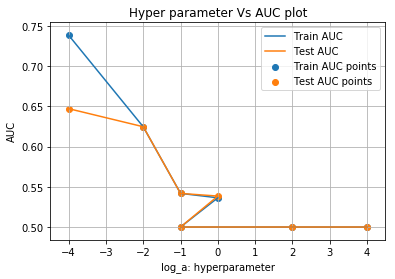

Best score:  0.6470730984440529
value of alpha with best score:  {'alpha': 0.0001}
Train AUC scores
0    0.738338
1    0.624529
2    0.541795
4    0.536300
3    0.500000
5    0.500000
6    0.500000
Name: mean_train_score, dtype: float64
CV AUC scores
0    0.647073
1    0.624630
2    0.541721
4    0.538469
3    0.500000
5    0.500000
6    0.500000
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.514467,0.039808,0.006260,0.007667,0.0001,{'alpha': 0.0001},0.649446,0.654205,0.633603,0.642598,...,0.739506,0.733909,0.737880,0.738903,0.734357,0.741592,0.733132,0.742071,0.738338,0.003221
1,0.987989,0.017166,0.009372,0.007653,0.01,{'alpha': 0.01},0.620741,0.637801,0.606057,0.655504,...,0.596646,0.663696,0.642423,0.623723,0.634467,0.590782,0.649023,0.592966,0.624529,0.024633
2,0.959317,0.020005,0.007811,0.007811,0.1,{'alpha': 0.1},0.531972,0.526129,0.521607,0.548407,...,0.530889,0.551638,0.575371,0.538231,0.537389,0.537720,0.523603,0.544505,0.541795,0.013203
4,0.954625,0.033835,0.003123,0.006245,0.1,{'alpha': 0.1},0.547919,0.526129,0.553256,0.541192,...,0.556760,0.532023,0.500817,0.534995,0.546371,0.534855,0.539089,0.535608,0.536300,0.013647
3,0.976503,0.012599,0.007808,0.007808,1,{'alpha': 1},0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000


In [81]:
svc = SGDClassifier(loss='hinge', penalty='l1', class_weight = 'balanced')
hyper_param_tuning(X_tr_1, y_train)

#### 4.1.1.3 Plotting Roc curve for Set 1

In [82]:
def prob_predict(clf, data):
    y_data_pred = []
    y_data_pred.extend(clf.predict_proba(data)[:,1])
    return y_data_pred

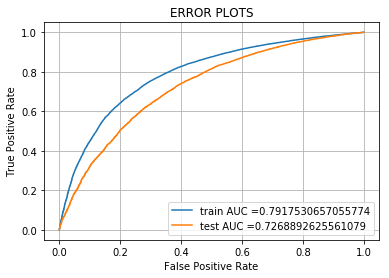

In [83]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
# https://stackoverflow.com/questions/55250963/how-to-get-probabilities-for-sgdclassifier-linearsvm
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

svc_bow = SGDClassifier(alpha = 0.01, penalty= 'l2', class_weight = 'balanced')
model = CalibratedClassifierCV(svc_bow)
model.fit(X_tr_1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = prob_predict(model, X_tr_1)
y_test_pred = prob_predict(model, X_te_1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
    

In [84]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [85]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)


the maximum value of tpr*(1-fpr) 0.529106231378851 for threshold 0.83


#### 4.1.1.4 Confusion Matrix

In [86]:
#http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
def get_confusion_matrix(y_train, y_train_pred):
    '''
    Generate matrix plot of confusion matrix with predicted and original labels.
    '''
    cm = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=0)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+"="+str(cm[i][j]))
    plt.show()

TRAIN CONFUSION MATRIX


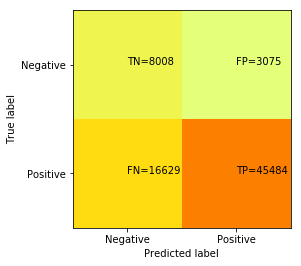

In [87]:
print("TRAIN CONFUSION MATRIX")
get_confusion_matrix(y_train, y_train_pred)

TEST CONFUSION MATRIX


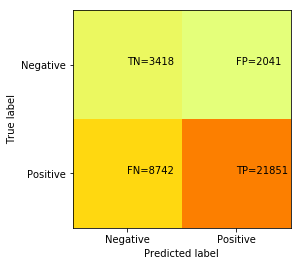

In [88]:
print("TEST CONFUSION MATRIX")
get_confusion_matrix(y_test, y_test_pred)

### 4.1.2 Applying SVM on tfidf (SET 2)

#### 4.1.2.1 Hyperparameter tuning Using L2 regulariser

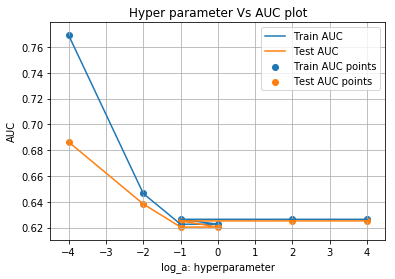

Best score:  0.6863276312391463
value of alpha with best score:  {'alpha': 0.0001}
Train AUC scores
0    0.769112
1    0.646413
2    0.622596
4    0.622582
3    0.626420
5    0.626386
6    0.626386
Name: mean_train_score, dtype: float64
CV AUC scores
0    0.686328
1    0.638273
2    0.620387
4    0.620393
3    0.625160
5    0.625162
6    0.625162
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.642389,0.021447,0.007883,0.007027,0.0001,{'alpha': 0.0001},0.691504,0.705680,0.687477,0.674747,...,0.777591,0.759767,0.773432,0.776793,0.745339,0.757965,0.786564,0.758182,0.769112,0.013497
1,0.662593,0.014622,0.009481,0.005867,0.01,{'alpha': 0.01},0.645756,0.639288,0.640129,0.627467,...,0.648675,0.648175,0.646243,0.646967,0.643520,0.645237,0.647531,0.647797,0.646413,0.001720
2,0.673175,0.013060,0.006331,0.006875,0.1,{'alpha': 0.1},0.626542,0.620593,0.624792,0.609258,...,0.622977,0.624060,0.623114,0.623683,0.621275,0.622199,0.621863,0.623174,0.622596,0.000907
4,0.664292,0.011695,0.007884,0.006048,0.1,{'alpha': 0.1},0.626778,0.621084,0.624560,0.609119,...,0.622620,0.623889,0.623081,0.623895,0.621592,0.622517,0.621330,0.622632,0.622582,0.000855
3,0.670337,0.019402,0.009433,0.007704,1,{'alpha': 1},0.628214,0.625178,0.628169,0.613479,...,0.626235,0.627783,0.627143,0.627361,0.625209,0.625936,0.625183,0.626970,0.626420,0.000839


In [98]:
# error plot for set 2
svc = SGDClassifier(loss='hinge', penalty='l2',class_weight = 'balanced')
hyper_param_tuning(X_tr_2, y_train)

#### 4.1.2.2 Hyperparameter tuning Using L1 regulariser

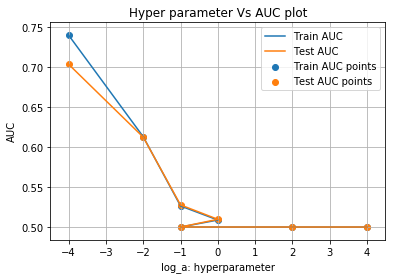

Best score:  0.7031496325627694
value of alpha with best score:  {'alpha': 0.0001}
Train AUC scores
0    0.739473
1    0.612683
2    0.526279
4    0.508714
3    0.500000
5    0.500000
6    0.500000
Name: mean_train_score, dtype: float64
CV AUC scores
0    0.703150
1    0.612191
2    0.527543
4    0.509593
3    0.500000
5    0.500000
6    0.500000
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.313854,0.026492,0.008604,0.007360,0.0001,{'alpha': 0.0001},0.716996,0.701111,0.701232,0.69164,...,0.747005,0.738853,0.750340,0.741034,0.742529,0.733662,0.719902,0.745534,0.739473,0.008527
1,0.953073,0.026148,0.007807,0.007807,0.01,{'alpha': 0.01},0.615653,0.612335,0.617601,0.60160,...,0.614236,0.615006,0.614827,0.613400,0.610677,0.615249,0.612230,0.610514,0.612683,0.002053
2,1.000116,0.076159,0.004720,0.007210,0.1,{'alpha': 0.1},0.589012,0.500000,0.500000,0.50000,...,0.500000,0.500000,0.587734,0.500000,0.587145,0.500000,0.500000,0.500000,0.526279,0.040142
4,0.971824,0.015306,0.007804,0.007804,0.1,{'alpha': 0.1},0.500000,0.500000,0.500000,0.50000,...,0.500000,0.500000,0.500000,0.500000,0.587145,0.500000,0.500000,0.500000,0.508714,0.026143
3,0.976510,0.016008,0.006244,0.007648,1,{'alpha': 1},0.500000,0.500000,0.500000,0.50000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000


In [99]:
svc = SGDClassifier(loss='hinge', penalty='l1',class_weight = 'balanced')
hyper_param_tuning(X_tr_2, y_train)

#### 4.1.2.3 Plotting Roc curve for Set 2

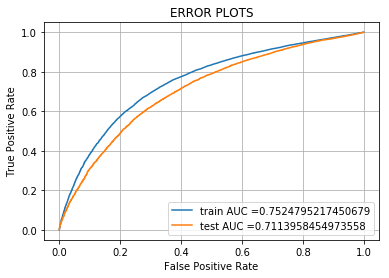

In [100]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
# https://stackoverflow.com/questions/55250963/how-to-get-probabilities-for-sgdclassifier-linearsvm
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

svc_bow = SGDClassifier(alpha = 0.0001, penalty= 'l1',class_weight = 'balanced')
model = CalibratedClassifierCV(svc_bow)
model.fit(X_tr_2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = prob_predict(model, X_tr_2)
y_test_pred = prob_predict(model, X_te_2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### 4.1.2.4 Confusion Matrix

In [101]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.48575908689058667 for threshold 0.842


TRAIN CONFUSION MATRIX


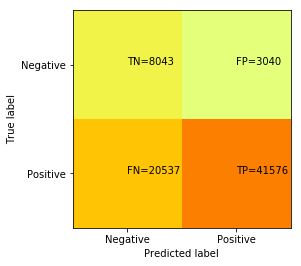

In [102]:
print("TRAIN CONFUSION MATRIX")
get_confusion_matrix(y_train, y_train_pred)

TEST CONFUSION MATRIX


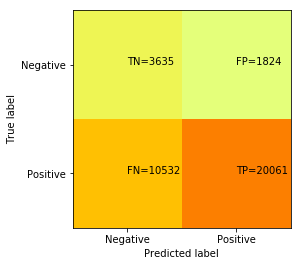

In [103]:
print("TEST CONFUSION MATRIX")
get_confusion_matrix(y_test, y_test_pred)

### 4.1.3 Applying SVM on Avg W2V (SET 3)

#### 4.1.3.1 Hyperparameter tuning Using L2 regulariser

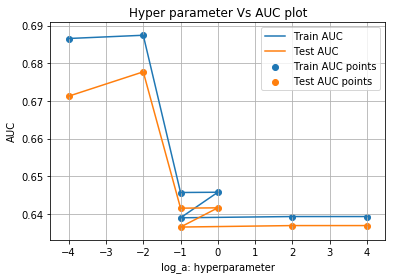

Best score:  0.6777381043152693
value of alpha with best score:  {'alpha': 0.01}
Train AUC scores
0    0.686574
1    0.687436
2    0.645749
4    0.645817
3    0.639049
5    0.639377
6    0.639377
Name: mean_train_score, dtype: float64
CV AUC scores
0    0.671285
1    0.677738
2    0.641598
4    0.641685
3    0.636589
5    0.636982
6    0.636981
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.809597,0.121142,0.021262,0.006171,0.0001,{'alpha': 0.0001},0.668932,0.682714,0.656736,0.669738,...,0.687429,0.695510,0.684019,0.685771,0.686434,0.692559,0.668000,0.692480,0.686574,0.007152
1,1.925756,0.064171,0.021871,0.007647,0.01,{'alpha': 0.01},0.692391,0.681078,0.670102,0.670990,...,0.688789,0.688109,0.689050,0.689027,0.686603,0.685027,0.684396,0.688633,0.687436,0.001569
2,1.941320,0.051871,0.023436,0.007812,0.1,{'alpha': 0.1},0.654578,0.643277,0.631366,0.633629,...,0.646004,0.646859,0.644906,0.648218,0.644779,0.644324,0.643985,0.646808,0.645749,0.001259
4,1.961229,0.042144,0.019278,0.006315,0.1,{'alpha': 0.1},0.654407,0.643470,0.630381,0.633518,...,0.645054,0.646449,0.644884,0.648519,0.644838,0.644982,0.644924,0.646709,0.645817,0.001189
3,2.171880,0.099263,0.024496,0.006506,1,{'alpha': 1},0.646559,0.636680,0.625249,0.626020,...,0.638315,0.639725,0.639226,0.640123,0.638253,0.638765,0.637875,0.639323,0.639049,0.000746


In [105]:
svc = SGDClassifier(loss='hinge', penalty='l2',class_weight = 'balanced')
hyper_param_tuning(X_tr_3, y_train)

#### 4.1.3.2 Hyperparameter tuning Using L1 regulariser

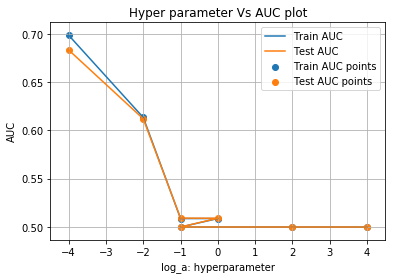

Best score:  0.6832627743718859
value of alpha with best score:  {'alpha': 0.0001}
Train AUC scores
0    0.698522
1    0.613417
2    0.508756
4    0.508771
3    0.500000
5    0.500000
6    0.500000
Name: mean_train_score, dtype: float64
CV AUC scores
0    0.683263
1    0.611993
2    0.509226
4    0.509080
3    0.500000
5    0.500000
6    0.500000
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,4.893264,0.226318,0.022692,0.007372,0.0001,{'alpha': 0.0001},0.691281,0.684497,0.680248,0.683002,...,0.706100,0.694982,0.694428,0.704862,0.682450,0.706780,0.691833,0.701865,0.698522,0.007334
1,4.947641,0.206390,0.025120,0.006791,0.01,{'alpha': 0.01},0.611570,0.613820,0.620009,0.605317,...,0.615862,0.618813,0.613547,0.613637,0.607539,0.609236,0.618956,0.614446,0.613417,0.003958
2,4.972842,0.066120,0.017276,0.004661,0.1,{'alpha': 0.1},0.500000,0.592239,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.508756,0.026268
4,4.895056,0.015959,0.021988,0.006836,0.1,{'alpha': 0.1},0.500000,0.500000,0.500000,0.590806,...,0.500000,0.587708,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.508771,0.026312
3,4.901596,0.014354,0.018085,0.005076,1,{'alpha': 1},0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000


In [106]:
svc = SGDClassifier(loss='hinge', penalty='l1',class_weight = 'balanced')
hyper_param_tuning(X_tr_3, y_train)

#### 4.1.3.3 Plotting Roc curve for Set 3

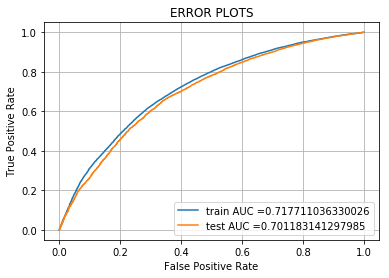

In [107]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
# https://stackoverflow.com/questions/55250963/how-to-get-probabilities-for-sgdclassifier-linearsvm
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

svc_bow = SGDClassifier(alpha = 0.0001, penalty= 'l1',class_weight = 'balanced')
model = CalibratedClassifierCV(svc_bow)
model.fit(X_tr_3, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = prob_predict(model, X_tr_3)
y_test_pred = prob_predict(model, X_te_3)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### 4.1.3.4 Confusion Matrix

In [108]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.4410367968051243 for threshold 0.844


TRAIN CONFUSION MATRIX


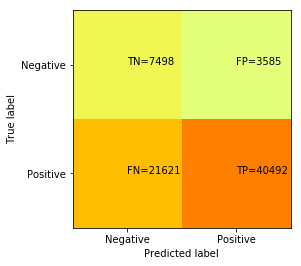

In [109]:
print("TRAIN CONFUSION MATRIX")
get_confusion_matrix(y_train, y_train_pred)

TEST CONFUSION MATRIX


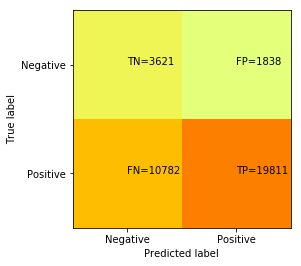

In [110]:
print("TEST CONFUSION MATRIX")
get_confusion_matrix(y_test, y_test_pred)

### 4.1.4 Applying SVM on TFIDF W2V (SET 4)

#### 4.1.4.1 Hyperparameter tuning Using L2 regulariser

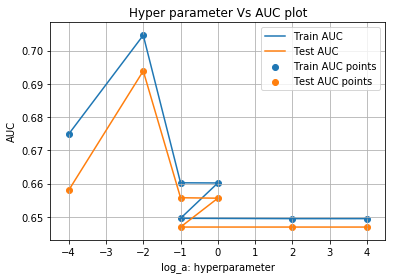

Best score:  0.6939135664737353
value of alpha with best score:  {'alpha': 0.01}
Train AUC scores
0    0.674902
1    0.704658
2    0.660267
4    0.660219
3    0.649583
5    0.649481
6    0.649481
Name: mean_train_score, dtype: float64
CV AUC scores
0    0.658016
1    0.693914
2    0.655769
4    0.655636
3    0.646955
5    0.646951
6    0.646951
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,2.017429,0.806404,0.021872,0.007652,0.0001,{'alpha': 0.0001},0.681553,0.653224,0.655100,0.661296,...,0.680744,0.675633,0.659399,0.679059,0.680376,0.685960,0.646493,0.682110,0.674902,0.011824
1,1.865801,0.026481,0.018750,0.006248,0.01,{'alpha': 0.01},0.705283,0.695740,0.682576,0.694136,...,0.706463,0.705482,0.703344,0.705698,0.702956,0.703902,0.703960,0.707984,0.704658,0.001607
2,2.119657,0.279874,0.021484,0.006647,0.1,{'alpha': 0.1},0.670374,0.658843,0.647344,0.647988,...,0.660251,0.660023,0.660537,0.661599,0.659111,0.659298,0.659462,0.662117,0.660267,0.000946
4,1.966674,0.080657,0.018975,0.002841,0.1,{'alpha': 0.1},0.669848,0.659211,0.647857,0.648209,...,0.660922,0.660044,0.659596,0.661312,0.658612,0.659605,0.659457,0.662642,0.660219,0.001185
3,1.951554,0.019369,0.021207,0.001001,1,{'alpha': 1},0.658547,0.647663,0.637522,0.635282,...,0.648790,0.650226,0.649692,0.651000,0.648446,0.649052,0.648334,0.650652,0.649583,0.000891


In [111]:
svc = SGDClassifier(loss='hinge', penalty='l2',class_weight = 'balanced')
hyper_param_tuning(X_tr_4, y_train)

#### 4.1.4.2 Hyperparameter tuning Using L1 regulariser

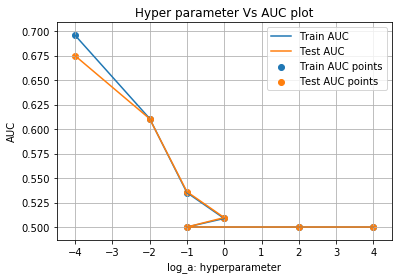

Best score:  0.6750075999299053
value of alpha with best score:  {'alpha': 0.0001}
Train AUC scores
0    0.695921
1    0.610815
2    0.535112
4    0.508714
3    0.500000
5    0.500000
6    0.500000
Name: mean_train_score, dtype: float64
CV AUC scores
0    0.675008
1    0.610616
2    0.536052
4    0.509593
3    0.500000
5    0.500000
6    0.500000
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,5.090693,0.457189,0.026819,0.006153,0.0001,{'alpha': 0.0001},0.684252,0.668946,0.67933,0.678885,...,0.703621,0.697366,0.691118,0.705651,0.690441,0.687936,0.692530,0.694511,0.695921,0.005577
1,5.078691,0.352764,0.023551,0.006988,0.01,{'alpha': 0.01},0.608541,0.608657,0.61573,0.601971,...,0.608094,0.612164,0.615293,0.610912,0.614997,0.610445,0.609640,0.614327,0.610815,0.003231
2,5.243652,0.267510,0.018024,0.005063,0.1,{'alpha': 0.1},0.500000,0.592239,0.50000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.587145,0.588411,0.588003,0.500000,0.535112,0.043004
4,5.125956,0.373796,0.019589,0.006338,0.1,{'alpha': 0.1},0.500000,0.500000,0.50000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.587145,0.500000,0.500000,0.500000,0.508714,0.026143
3,4.925173,0.034785,0.021875,0.007650,1,{'alpha': 1},0.500000,0.500000,0.50000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000


In [112]:
svc = SGDClassifier(loss='hinge', penalty='l1',class_weight = 'balanced')
hyper_param_tuning(X_tr_4, y_train)

#### 4.1.4.3 Plotting Roc curve for Set 4

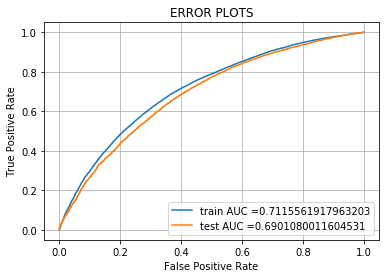

In [113]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
# https://stackoverflow.com/questions/55250963/how-to-get-probabilities-for-sgdclassifier-linearsvm
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

svc_bow = SGDClassifier(alpha = 0.0001, penalty= 'l1',class_weight = 'balanced')
model = CalibratedClassifierCV(svc_bow)
model.fit(X_tr_4, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = prob_predict(model, X_tr_4)
y_test_pred = prob_predict(model, X_te_4)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### 4.1.4.4 Confusion Matrix

In [114]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.43568158954075625 for threshold 0.835


TRAIN CONFUSION MATRIX


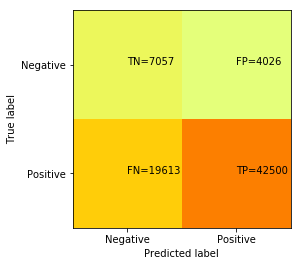

In [115]:
print("TRAIN CONFUSION MATRIX")
get_confusion_matrix(y_train, y_train_pred)

TEST CONFUSION MATRIX


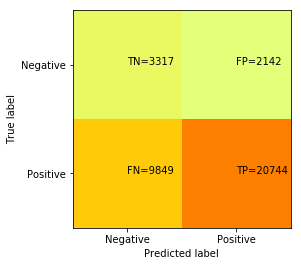

In [116]:
print("TEST CONFUSION MATRIX")
get_confusion_matrix(y_test, y_test_pred)

<h2>4.2 Support Vector Machines with added Features `Set 5` </h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

#### 4.2.1 Standardising word count essay

In [117]:
word_count_essay_scalar = StandardScaler()
word_count_essay_scalar.fit((X_train['word_count_essay'].values.astype(float)).reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {word_count_essay_scalar.mean_[0]}, Standard deviation : {np.sqrt(word_count_essay_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
word_count_essay_std_train = word_count_essay_scalar.transform((X_train['word_count_essay'].values.astype(float)).reshape(-1, 1))
word_count_essay_std_test = word_count_essay_scalar.transform((X_test['word_count_essay'].values.astype(float)).reshape(-1, 1))
print(word_count_essay_std_train.shape,y_train.shape)
print(word_count_essay_std_test.shape,y_test.shape)

Mean : 151.4318678616318, Standard deviation : 38.97341130425965
(73196, 1) (73196,)
(36052, 1) (36052,)


#### 4.2.2 Standardising word count title

In [118]:
word_count_title_scalar = StandardScaler()
word_count_title_scalar.fit((X_train['word_count_title'].values.astype(float)).reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {word_count_title_scalar.mean_[0]}, Standard deviation : {np.sqrt(word_count_title_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
word_count_title_std_train = word_count_essay_scalar.transform((X_train['word_count_title'].values.astype(float)).reshape(-1, 1))
word_count_title_std_test = word_count_essay_scalar.transform((X_test['word_count_title'].values.astype(float)).reshape(-1, 1))
print(word_count_title_std_train.shape,y_train.shape)
print(word_count_title_std_test.shape,y_test.shape)

Mean : 4.334362533471775, Standard deviation : 1.7889369058844167
(73196, 1) (73196,)
(36052, 1) (36052,)


#### 4.2.3 Standardising sentiment scores of each essay

In [119]:
neg_scalar = StandardScaler()
neg_scalar.fit(X_train['neg'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {neg_scalar.mean_[0]}, Standard deviation : {np.sqrt(neg_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
neg_std_train = neg_scalar.transform(X_train['neg'].values.reshape(-1, 1))
neg_std_test =neg_scalar.transform(X_test['neg'].values.reshape(-1, 1))
print(neg_std_train.shape, y_train.shape)
print(neg_std_test.shape, y_test.shape)

Mean : 0.04515562325810154, Standard deviation : 0.033939307329286114
(73196, 1) (73196,)
(36052, 1) (36052,)


In [120]:
pos_scalar = StandardScaler()
pos_scalar.fit(X_train['pos'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {pos_scalar.mean_[0]}, Standard deviation : {np.sqrt(pos_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
pos_std_train = pos_scalar.transform(X_train['pos'].values.reshape(-1, 1))
pos_std_test = pos_scalar.transform(X_test['pos'].values.reshape(-1, 1))
print(pos_std_train.shape, y_train.shape)
print(pos_std_test.shape, y_test.shape)

Mean : 0.2662285507404776, Standard deviation : 0.07392895289136912
(73196, 1) (73196,)
(36052, 1) (36052,)


In [121]:
neu_scalar = StandardScaler()
neu_scalar.fit(X_train['neu'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {neu_scalar.mean_[0]}, Standard deviation : {np.sqrt(neu_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
neu_std_train = neu_scalar.transform(X_train['pos'].values.reshape(-1, 1))
neu_std_test = neu_scalar.transform(X_test['pos'].values.reshape(-1, 1))
print(neu_std_train.shape, y_train.shape)
print(neu_std_test.shape, y_test.shape)

Mean : 0.6886155664243948, Standard deviation : 0.07230568361813375
(73196, 1) (73196,)
(36052, 1) (36052,)


In [122]:
compound_scalar = StandardScaler()
compound_scalar.fit(X_train['compound'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {compound_scalar.mean_[0]}, Standard deviation : {np.sqrt(compound_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
compound_std_train = compound_scalar.transform(X_train['compound'].values.reshape(-1, 1))
compound_std_test = compound_scalar.transform(X_test['compound'].values.reshape(-1, 1))
print(compound_std_train.shape, y_train.shape)
print(compound_std_test.shape, y_test.shape)

Mean : 0.9586679026176292, Standard deviation : 0.15418529792107544
(73196, 1) (73196,)
(36052, 1) (36052,)


In [123]:
print("************Categorical Features************")
print(X_train_categories_ohe.shape)
print(X_test_categories_ohe.shape)
print(X_train_subcategories_ohe.shape)
print(X_test_subcategories_ohe.shape)
print(X_train_state_ohe.shape)
print(X_test_state_ohe.shape)
print(X_train_grade_ohe.shape)
print(X_test_grade_ohe.shape)
print("***********Numerical Features************")
print(quantity_standardized_train.shape)
print(quantity_standardized_test.shape)
print(prev_projects_standardized_train.shape)
print(prev_projects_standardized_train.shape)
print(price_standardized_train.shape)
print(price_standardized_test.shape)
print(compound_std_train.shape)
print(compound_std_test.shape)
print(neu_std_train.shape)
print(neu_std_test.shape)
print(pos_std_train.shape)
print(pos_std_test.shape)
print(neg_std_train.shape)
print(neg_std_test.shape)
print(word_count_title_std_train.shape)
print(word_count_title_std_test.shape)
print(word_count_essay_std_train.shape)
print(word_count_essay_std_test.shape)

************Categorical Features************
(73196, 9)
(36052, 9)
(73196, 30)
(36052, 30)
(73196, 51)
(36052, 51)
(73196, 4)
(36052, 4)
***********Numerical Features************
(73196, 1)
(36052, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(36052, 1)
(73196, 1)
(36052, 1)
(73196, 1)
(36052, 1)
(73196, 1)
(36052, 1)
(73196, 1)
(36052, 1)
(73196, 1)
(36052, 1)
(73196, 1)
(36052, 1)


In [124]:
print("Shape of X_train_essay_tfidf is : ", X_train_essay_tfidf.shape)

Shape of X_train_essay_tfidf is :  (73196, 5000)


#### 4.2.4 Selecting optimal dimension by elbow method

In [127]:
from sklearn.decomposition import TruncatedSVD
dim = [5,25,50,100,500,1000,1500,1600,1700,1800,1900,2000]
explained_var_sum= []
for d in tqdm(dim , position=0, leave= True):
    svd = TruncatedSVD(n_components = d, n_iter = 5, random_state=42)
    svd.fit(X_train_essay_tfidf)
    explained_var_sum.append(svd.explained_variance_ratio_.sum())
print("explained_var_sum = ",explained_var_sum)

100%|█████████████████████████████████████████| 12/12 [50:05<00:00, 423.28s/it]


explained_var_sum =  [0.0304031174741989, 0.09040373448772884, 0.13235548413987375, 0.19332475462812745, 0.43824368846188566, 0.5942773035476773, 0.6962678141540051, 0.7131064435970107, 0.7290412827072688, 0.7441782031952101, 0.7586064587749346, 0.7723260251501587]


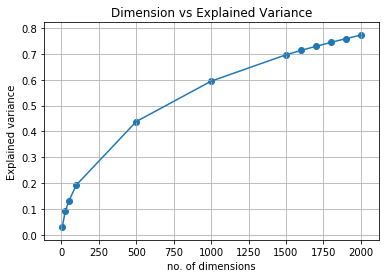

In [128]:
plt.plot(dim, explained_var_sum)
plt.xlabel('no. of dimensions')
plt.ylabel('Explained variance')
plt.scatter(dim, explained_var_sum)
plt.title("Dimension vs Explained Variance")
plt.grid()
plt.show()
#plt.legend()

In [129]:
optimal_dimension = 2000
svd = TruncatedSVD(n_components = optimal_dimension, n_iter = 5, random_state = 42)
svd.fit(X_train_essay_tfidf)
X_train_essay_tfidf_svd = svd.transform(X_train_essay_tfidf)
X_test_essay_tfidf_svd = svd.transform(X_test_essay_tfidf)
print(X_train_essay_tfidf_svd.shape)
print(X_test_essay_tfidf_svd.shape)

(73196, 2000)
(36052, 2000)


#### 4.2.5 Merging all added features

In [130]:
# Merging all categorical and numerical features along with tfidf preprocessed essays
X_tr_5 = hstack((X_train_essay_tfidf_svd , X_train_categories_ohe, X_train_subcategories_ohe, X_train_state_ohe, \
                 X_train_teacher_ohe, X_train_grade_ohe, price_standardized_train, quantity_standardized_train, \
                 prev_projects_standardized_train, compound_std_train, neu_std_train, pos_std_train, neg_std_train, \
                 word_count_title_std_train, word_count_essay_std_train)).tocsr()

#X_cr = hstack((X_cv_essay_bow, X_cv_title_bow, X_cv_resources_bow, X_cv_categories_ohe, X_cv_subcategories_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_quantity_norm, X_cv_projects_norm)).tocsr()

X_te_5 = hstack((X_test_essay_tfidf_svd, X_test_categories_ohe, X_test_subcategories_ohe, X_test_state_ohe, X_test_teacher_ohe, \
                 X_test_grade_ohe, price_standardized_test, quantity_standardized_test, prev_projects_standardized_test, \
                 compound_std_test, neu_std_test, pos_std_test, neg_std_test, word_count_title_std_test, word_count_essay_std_test)).tocsr()

print("Final Data matrix")
print(X_tr_5.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te_5.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 2108) (73196,)
(36052, 2108) (36052,)


### 4.2.6 Applying SVM on added features (SET 5)

#### 4.2.6.1 Hyperparameter tuning Using L2 regulariser

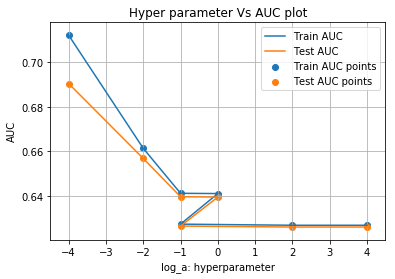

Best score:  0.6903835150998499
value of alpha with best score:  {'alpha': 0.0001}
Train AUC scores
0    0.711999
1    0.661413
2    0.641293
4    0.641185
3    0.627509
5    0.627006
6    0.627006
Name: mean_train_score, dtype: float64
CV AUC scores
0    0.690384
1    0.656884
2    0.639755
4    0.639624
3    0.626645
5    0.626210
6    0.626210
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,7.038949,4.892151,0.226581,0.322936,0.0001,{'alpha': 0.0001},0.717738,0.702681,0.663652,0.690548,...,0.678226,0.724851,0.705809,0.704904,0.725761,0.717528,0.711631,0.695055,0.711999,0.015568
1,5.851091,0.130291,0.067183,0.018553,0.01,{'alpha': 0.01},0.670047,0.649580,0.655308,0.645260,...,0.661422,0.661825,0.661939,0.662387,0.662294,0.659312,0.662543,0.661048,0.661413,0.001006
2,6.777805,0.221484,0.092183,0.025629,0.1,{'alpha': 0.1},0.652012,0.631364,0.637853,0.629141,...,0.641335,0.642820,0.640858,0.641531,0.639344,0.642695,0.640131,0.641526,0.641293,0.001094
4,6.525335,0.117869,0.079680,0.008414,0.1,{'alpha': 0.1},0.651880,0.631993,0.637146,0.628664,...,0.640787,0.642485,0.640962,0.641118,0.640219,0.641924,0.639497,0.642121,0.641185,0.001105
3,6.704057,0.107950,0.074996,0.006246,1,{'alpha': 1},0.641410,0.618937,0.618611,0.619586,...,0.626741,0.629594,0.627239,0.627359,0.626422,0.627662,0.625899,0.627749,0.627509,0.001080


In [131]:
svc = SGDClassifier(loss='hinge', penalty='l2',class_weight = 'balanced')
hyper_param_tuning(X_tr_5, y_train)

#### 4.2.6.2 Hyperparameter tuning Using L1 regulariser

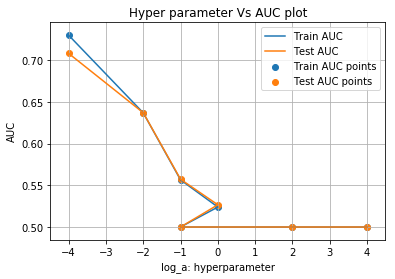

Best score:  0.7083341852098831
value of alpha with best score:  {'alpha': 0.0001}
Train AUC scores
0    0.730139
1    0.636995
2    0.556542
4    0.523950
3    0.500000
5    0.500000
6    0.500000
Name: mean_train_score, dtype: float64
CV AUC scores
0    0.708334
1    0.637119
2    0.557302
4    0.526680
3    0.500000
5    0.500000
6    0.500000
Name: mean_test_score, dtype: float64


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,16.392638,0.267898,0.081249,0.011702,0.0001,{'alpha': 0.0001},0.717167,0.705978,0.700391,0.705927,...,0.729488,0.724289,0.732022,0.734857,0.732073,0.727222,0.727531,0.730696,0.730139,0.003791
1,15.693627,0.059033,0.084376,0.017406,0.01,{'alpha': 0.01},0.646630,0.630177,0.642287,0.624987,...,0.637862,0.638106,0.635916,0.637005,0.635673,0.639467,0.636164,0.636463,0.636995,0.001425
2,16.650610,0.141382,0.116087,0.065646,0.1,{'alpha': 0.1},0.589012,0.553945,0.568737,0.500000,...,0.564623,0.500000,0.500000,0.563773,0.564311,0.566292,0.588003,0.564254,0.556542,0.029656
4,16.566165,0.252153,0.118751,0.103696,0.1,{'alpha': 0.1},0.500000,0.500000,0.597818,0.500000,...,0.597343,0.500000,0.500000,0.555012,0.587145,0.500000,0.500000,0.500000,0.523950,0.037895
3,16.828965,0.379355,0.076560,0.004688,1,{'alpha': 1},0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000


In [132]:
svc = SGDClassifier(loss='hinge', penalty='l1',class_weight = 'balanced')
hyper_param_tuning(X_tr_5, y_train)

#### 4.2.6.3 Plotting Roc curve for Set 5

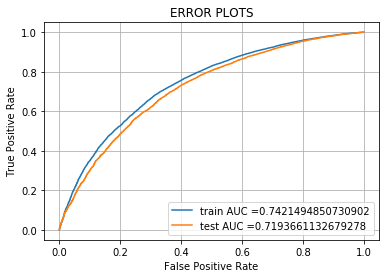

In [133]:
svc_bow = SGDClassifier(alpha = 0.0001, penalty= 'l1',class_weight = 'balanced')
model = CalibratedClassifierCV(svc_bow)
model.fit(X_tr_5, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = prob_predict(model, X_tr_5)
y_test_pred = prob_predict(model, X_te_5)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### 4.2.6.4 Confusion Matrix

In [134]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.4678768135216657 for threshold 0.837


TRAIN CONFUSION MATRIX


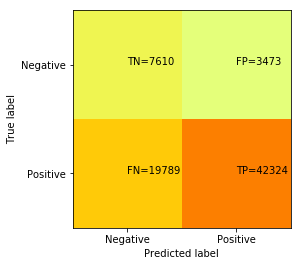

In [135]:
print("TRAIN CONFUSION MATRIX")
get_confusion_matrix(y_train, y_train_pred)

TEST CONFUSION MATRIX


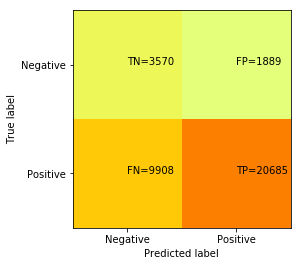

In [136]:
print("TEST CONFUSION MATRIX")
get_confusion_matrix(y_test, y_test_pred)

<h1>5. Conclusion</h1>

In [ ]:
# Please compare all your models using Prettytable library

In [137]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Vectorizer","Model","Hyperparameter","Regulariser", "Train AUC", "Test Auc"]
x.add_row(["BOW","SVM", 0.01,"L2", 0.79, 0.72])
x.add_row(["------------------","-----------","---------------","-----------","-----------","-----------"])
x.add_row(["TFIDF","SVM", 0.0001, "L1", 0.75, 0.71 ])
x.add_row(["------------------","-----------","---------------","-----------","-----------","-----------"])
x.add_row(["AVG_W2V","SVM", 0.0001, "L1", 0.71, 0.70])
x.add_row(["------------------","-----------","---------------","-----------","-----------","-----------"])
x.add_row(["TFIDF_W2V","SVM", 0.0001, "L1", 0.71, 0.69])
x.add_row(["------------------","-----------","---------------","-----------","-----------","-----------"])
x.add_row(["TFIDF TRUNCATED SVD","SVM", 0.0001, "L1", 0.74, 0.71])
print(x)

+---------------------+-------------+-----------------+-------------+-------------+-------------+
|      Vectorizer     |    Model    |  Hyperparameter | Regulariser |  Train AUC  |   Test Auc  |
+---------------------+-------------+-----------------+-------------+-------------+-------------+
|         BOW         |     SVM     |       0.01      |      L2     |     0.79    |     0.72    |
|  ------------------ | ----------- | --------------- | ----------- | ----------- | ----------- |
|        TFIDF        |     SVM     |      0.0001     |      L1     |     0.75    |     0.71    |
|  ------------------ | ----------- | --------------- | ----------- | ----------- | ----------- |
|       AVG_W2V       |     SVM     |      0.0001     |      L1     |     0.71    |     0.7     |
|  ------------------ | ----------- | --------------- | ----------- | ----------- | ----------- |
|      TFIDF_W2V      |     SVM     |      0.0001     |      L1     |     0.71    |     0.69    |
|  -----------------